In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import DBSCAN
%matplotlib inline

In [2]:
iris_df = pd.read_csv('C:\data\iris.data.csv')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris_df.iloc[:,:-1].values

y = iris_df.iloc[:,-1].values

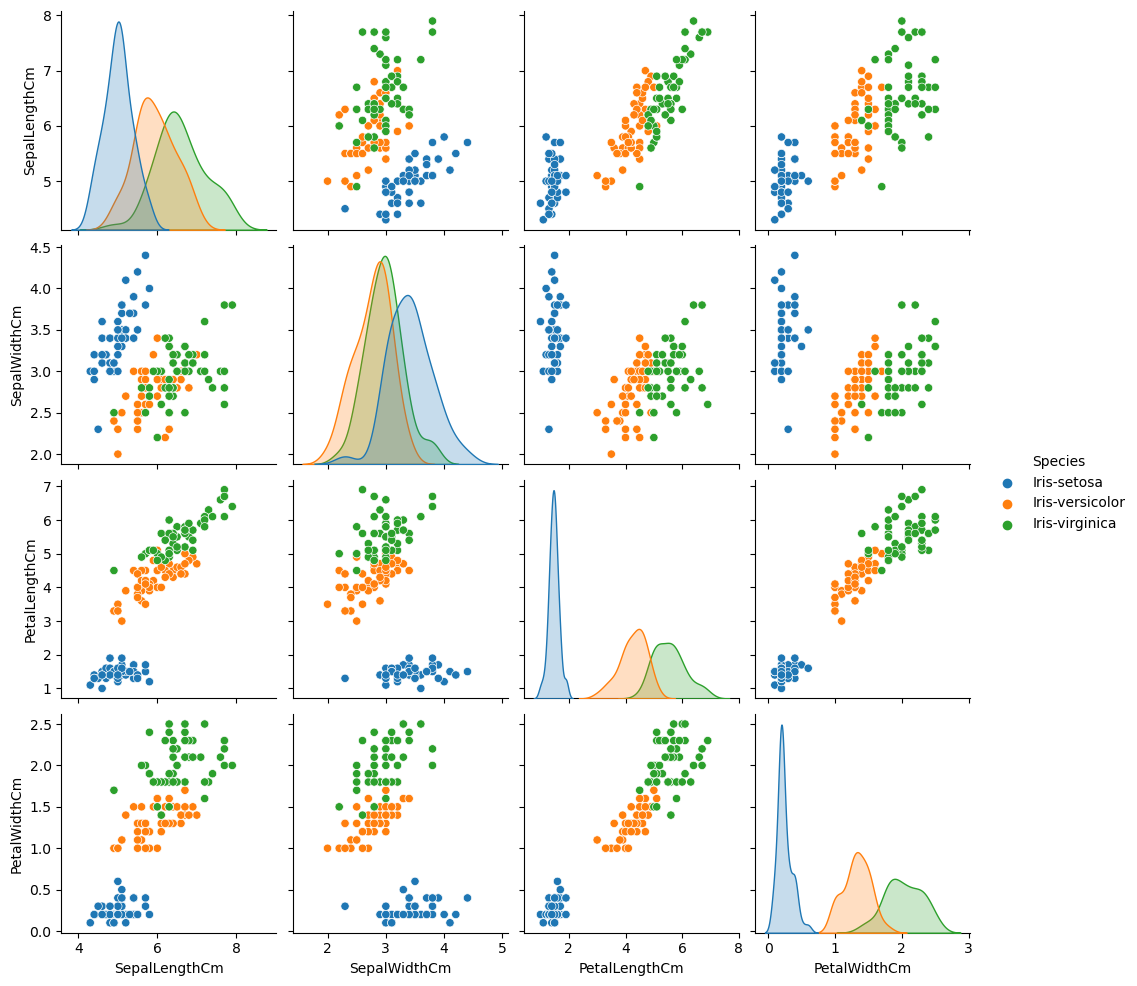

In [4]:
sns.pairplot(iris_df, hue='Species')

In [5]:
#分割data
iris_df['Species'].replace('Iris-setosa', 0, inplace=True)
iris_df['Species'].replace('Iris-versicolor', 1, inplace=True)
iris_df['Species'].replace('Iris-virginica', 2, inplace=True)

In [6]:
iris_features = iris_df.drop(['Species'], axis=1)
iris_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_target = iris_df['Species']
iris_target.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [8]:

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean').fit_predict(iris_features)

iris_df['dbscan'] = dbscan
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,dbscan
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [9]:
pd.crosstab(iris_df['Species'], iris_df['dbscan'])

dbscan,-1,0,1
Species,,,
0,1,49,0
1,4,0,46
2,8,0,42


In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

iris_df['silhouette_dbscan'] = silhouette_samples(iris_features, iris_df['dbscan'])
average_score = silhouette_score(iris_features, iris_df['dbscan'])

print('DBSCAN Silhouette Analysis Score :', average_score)
iris_df.head()

DBSCAN Silhouette Analysis Score : 0.5419178830436095


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,dbscan,silhouette_dbscan
0,5.1,3.5,1.4,0.2,0,0,0.875929
1,4.9,3.0,1.4,0.2,0,0,0.844998
2,4.7,3.2,1.3,0.2,0,0,0.854948
3,4.6,3.1,1.5,0.2,0,0,0.835301
4,5.0,3.6,1.4,0.2,0,0,0.871778


In [11]:
iris_df.groupby('dbscan')['silhouette_dbscan'].mean()

dbscan
-1   -0.245385
 0    0.831108
 1    0.497198
Name: silhouette_dbscan, dtype: float64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

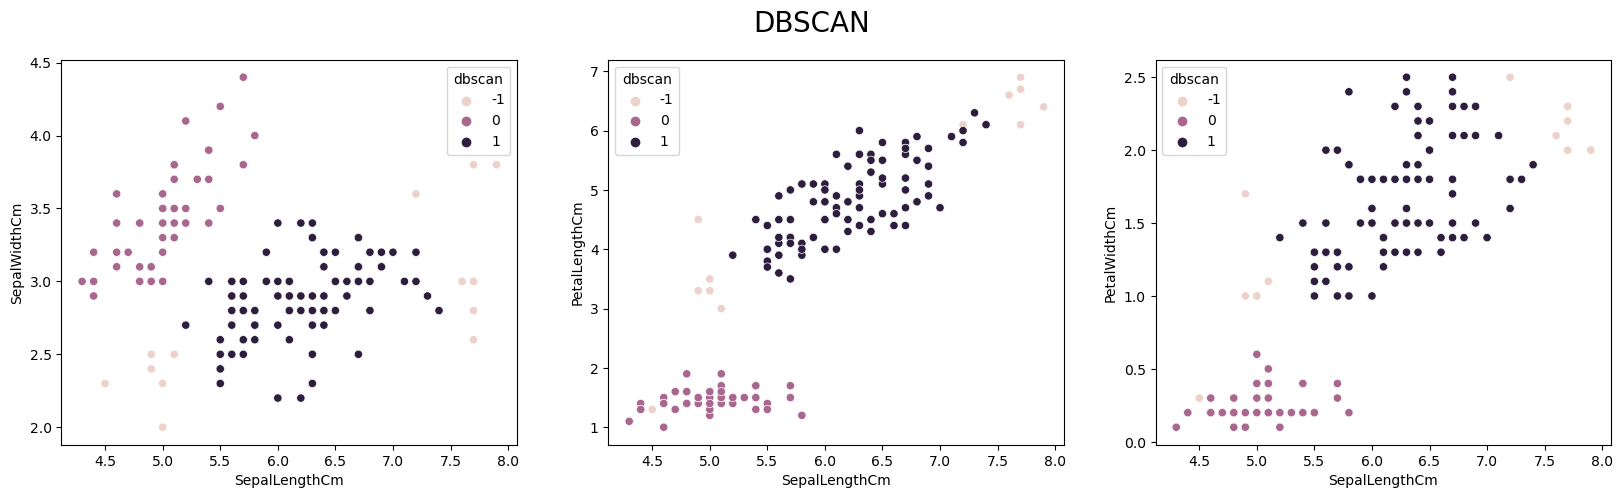

In [12]:
# DBSCAN Result

plt.figure(figsize=(20, 5))

plt.suptitle('DBSCAN', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,1], hue=iris_df['dbscan'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,2], hue=iris_df['dbscan'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=iris_df.iloc[:,0], y=iris_df.iloc[:,3], hue=iris_df['dbscan'])

In [13]:

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, dbscan)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 68.67%
